In this tutorial, I am using a dataset from Kaggle listing the insurance cost information of clients in US to conduct a basic exploratory data analysis and visualization with pandas and matplotlib. We use this data to predictive model which can be used to estimate the insurance annual cost for the clients.
Let's import all the libraries first

## Data Visualization

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Now let's read the insurance dataset using the pandas. The data can be read into a pandas DataFrame which can be used to extract all the important information about the dataset. The dataframe is a 2 dimensional where each row represents an observation and each column represents the features of the observation.

Similarly data from a single column can be read using the pandas Series class.

In [2]:
data_path = "../datasets/insurance.csv"  # data path
df = pd.read_csv(data_path)        # reading the datafile into a pandas dataframe


Let's conduct some investigation of the dataset:

In [3]:
df.info() # Get some basic information about the dataset with all the columns and their data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


There are 1338 rows and 7 columns. In this dataset, there are a total of 1338 insurance clients and associated 7 features. Let's take a look at the first 5 of them using df.head function

In [4]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


The dataset shows the age, sex, bmi, number of children, whether a smoker, living region and the insurance charges for the first 5 clients. We can also use df.columns to get the featuress and df.shape to get the size of this dataset.

In [5]:
print(f" The shape of the dataset is {df.shape}") 
print(df.columns)

 The shape of the dataset is (1338, 7)
Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')


Each column can be accessed via df["feature_name"]. Let's look at the age column and print 20 values

In [6]:
print(df["age"][:20])

0     19
1     18
2     28
3     33
4     32
5     31
6     46
7     37
8     37
9     60
10    25
11    62
12    23
13    56
14    27
15    19
16    52
17    23
18    56
19    30
Name: age, dtype: int64


When there are boolen data types, they can be converted to intiger data type using df["feature_name"].astype("int64"). In this case we don't have any boolean values. We can also use the other data types. 

Let's use take a basics statistics of each numerical column:
df.describe will give the non-null value count, mean, standard deviation, minimum, maximun and different percentile values. By default, the function will output information of all the numerical columns

In [7]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Other categorical information statistics can be listed as follows

In [8]:
df.describe(include=["object", "bool", "category"]) 


,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


Here we can see that there are 2 unique categories for sex, 2 categories for smokers and 4 categories for the regions. Let's see what are those unique categories.

In [9]:
print(df["sex"].unique())
print(df["smoker"].unique())
print(df["region"].unique())

['female' 'male']
['yes' 'no']
['southwest' 'southeast' 'northwest' 'northeast']


Let's see how much is the count for each of the catogories.


In [10]:
print(df["sex"].value_counts())

male      676
female    662
Name: sex, dtype: int64


In [11]:
print(df["smoker"].value_counts())

no     1064
yes     274
Name: smoker, dtype: int64


In [12]:
print(df["region"].value_counts())

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64


Now let's do some sorting of the data by each column features. First let's sort the data by insurance charges in the descending order and take a look at the first 5 clients. Similary we can sort based on multiple features as well.

In [13]:
df.sort_values(by = ["charges"], ascending = [False]).head()

,age,sex,bmi,children,smoker,region,charges
543,54,female,47.410,0,yes,southeast,63770.42801
1300,45,male,30.360,0,yes,southeast,62592.87309
1230,52,male,34.485,3,yes,northwest,60021.39897
577,31,female,38.095,1,yes,northeast,58571.07448
819,33,female,35.530,0,yes,northwest,55135.40209


In [14]:
df.sort_values(by = ["age","charges"], ascending = [True, False]).head()

,age,sex,bmi,children,smoker,region,charges
803,18,female,42.240,0,yes,southeast,38792.68560
759,18,male,38.170,0,yes,southeast,36307.79830
161,18,female,36.850,0,yes,southeast,36149.48350
623,18,male,33.535,0,yes,northeast,34617.84065
57,18,male,31.680,2,yes,southeast,34303.16720


Let's print the min, max and mean of a feature column:

In [15]:
print(df["age"].min(), df["age"].max(), df["age"].mean(), df["age"].median())

18 64 39.20702541106129 39.0


Let's do some slicing of the data:
Use df.loc while using feature names and iloc while using index values of rows and columns.

Interestingly loc will include the starting and last rows whereas the iloc will not include the last column index.


In [16]:
df.loc[0:3, "age": "region"]

,age,sex,bmi,children,smoker,region
0,19,female,27.900,0,yes,southwest
1,18,male,33.770,1,no,southeast
2,28,male,33.000,3,no,southeast
3,33,male,22.705,0,no,northwest


In [17]:
df.iloc[0:3, 0:4]

,age,sex,bmi,children
0,19,female,27.90,0
1,18,male,33.77,1
2,28,male,33.00,3


We can use df.apply function to apply a function in each column of the dataset. Let's look at the maximum values in each column.

In [18]:
df.apply(np.max)

age                  64
sex                male
bmi               53.13
children              5
smoker              yes
region        southwest
charges     63770.42801
dtype: object

Now let's try to do some extraction of the values based on the categories. Let's look at people from north east who are female and aged > 40.

In [19]:
df[(df['sex'] == 'female') & (df['region'] == 'northeast') & (df['age'] > 40)]

,age,sex,bmi,children,smoker,region,charges
16,52,female,30.780,1,no,northeast,10797.33620
20,60,female,36.005,0,no,northeast,13228.84695
26,63,female,23.085,0,no,northeast,14451.83515
56,58,female,31.825,2,no,northeast,13607.36875
81,45,female,38.285,0,no,northeast,7935.29115
...,...,...,...,...,...,...,...
1236,63,female,21.660,0,no,northeast,14449.85440
1259,52,female,23.180,0,no,northeast,10197.77220
1264,49,female,33.345,2,no,northeast,10370.91255
1285,47,female,24.320,0,no,northeast,8534.67180


Now let's do some plotting to get an understanding of the data or to find any obvious correlations/patterns. For plotting let's use the matplotlib package for more flexibility. But we can alway use the df.plot for quick plotting as well.

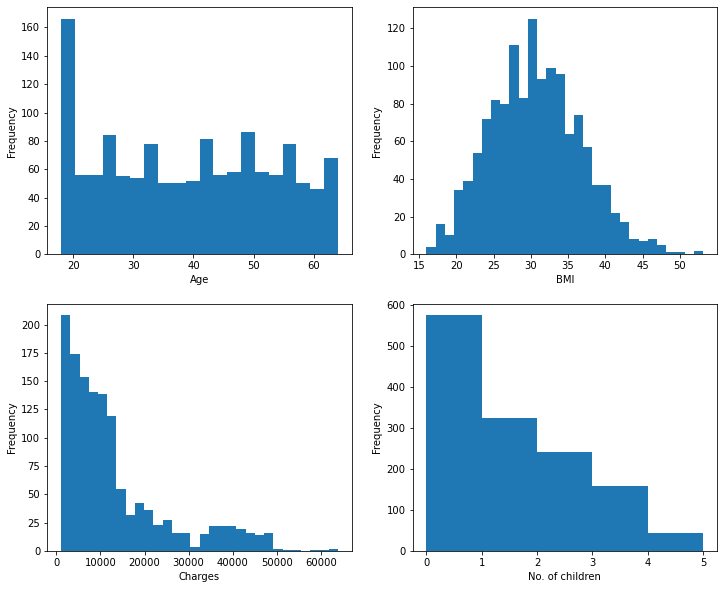

In [20]:
fig = plt.figure(figsize = (12,10))

plt.subplot(2,2,1)
plt.hist(df['age'], bins = 20)
plt.xlabel("Age")
plt.ylabel("Frequency")

plt.subplot(2,2,2)
plt.hist(df['bmi'], bins = 30)
plt.xlabel("BMI")
plt.ylabel("Frequency")

plt.subplot(2,2,3)
plt.hist(df['charges'], bins = 30)
plt.xlabel("Charges")
plt.ylabel("Frequency")

plt.subplot(2,2,4)
plt.hist(df['children'], bins = 5)
plt.xlabel("No. of children")
plt.ylabel("Frequency")

plt.show()

As we can see, the age distribution is mostly random and relatively there is a higher younger population in this dataset. A health BMI is between 18-25, 25-30 is overweight and above 30 is obese. Even though the distribution is more or less Gaussian, most of the population is overweight and obese. Most of the families have less than 10k annual charges and single children.

Now let's see how the charges vary as a function of various factors:
let's look at region wise data:

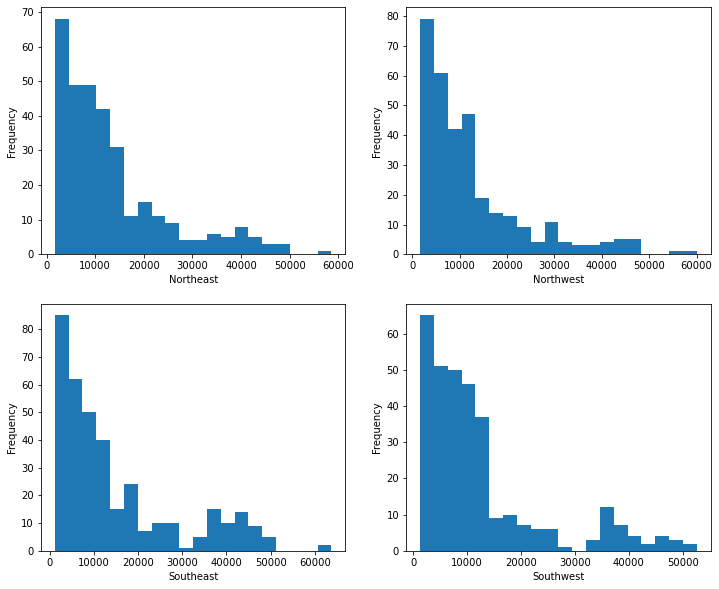

In [21]:
fig = plt.figure(figsize = (12,10))

plt.subplot(2,2,1)
plt.hist(df[df['region'] == 'northeast']['charges'], bins = 20)
plt.xlabel("Northeast")
plt.ylabel("Frequency")

plt.subplot(2,2,2)
plt.hist(df[df['region'] == 'northwest']['charges'], bins = 20)
plt.xlabel("Northwest")
plt.ylabel("Frequency")

plt.subplot(2,2,3)
plt.hist(df[df['region'] == 'southeast']['charges'], bins = 20)
plt.xlabel("Southeast")
plt.ylabel("Frequency")

plt.subplot(2,2,4)
plt.hist(df[df['region'] == 'southwest']['charges'], bins = 20)
plt.xlabel("Southwest")
plt.ylabel("Frequency")

plt.show()

So here we do not see any correlation between regions and associated charges. Now let's compare the charges with other parameters:

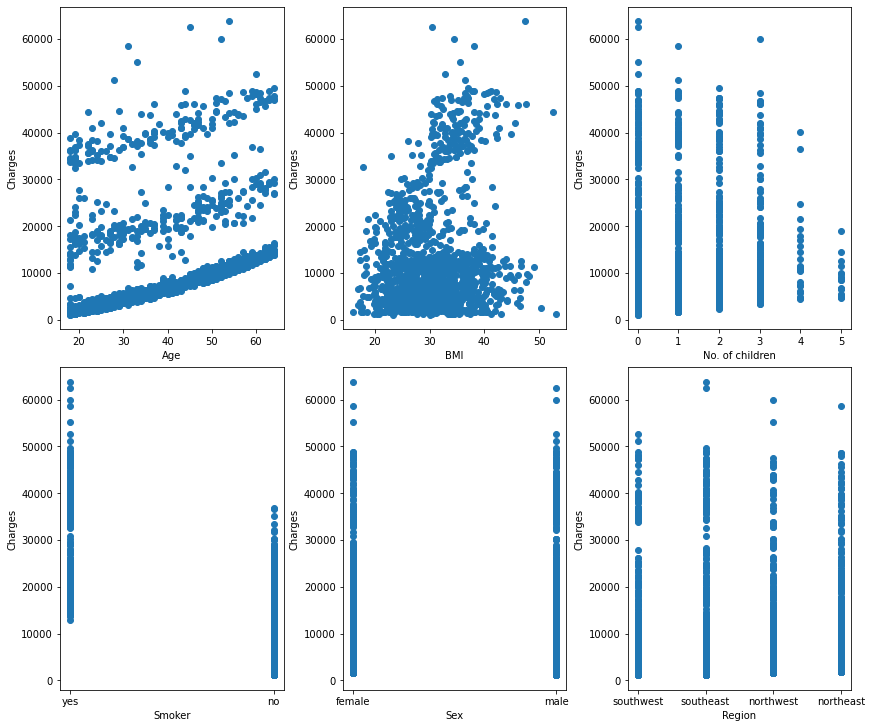

In [22]:
fig = plt.figure(figsize = (12,10), constrained_layout = True)

plt.subplot(2,3,1)
plt.scatter(df['age'], df['charges'])
plt.xlabel("Age")
plt.ylabel("Charges")

plt.subplot(2,3,2)
plt.scatter(df['bmi'], df['charges'])
plt.xlabel("BMI")
plt.ylabel("Charges")

plt.subplot(2,3,3)
plt.scatter(df['children'], df['charges'])
plt.xlabel("No. of children")
plt.ylabel("Charges")

plt.subplot(2,3,4)
plt.scatter(df['smoker'], df['charges'])
plt.xlabel("Smoker")
plt.ylabel("Charges")

plt.subplot(2,3,5)
plt.scatter(df['sex'], df['charges'])
plt.xlabel("Sex")
plt.ylabel("Charges")

plt.subplot(2,3,6)
plt.scatter(df['region'], df['charges'])
plt.xlabel("Region")
plt.ylabel("Charges")
plt.show()

Here we see a clear correlation between insurance charge and the age of clients. As the age of client increases, the insurance cost increases. Also, it obvious that there are 3 distinct classes within the age category. Maybe there is a slight correlation between BMI and charges, however it is not a significant one. At the same time, it is work noticing that most of the overweight/obese individuals do not have high indurnce charges.

Insurance charges are higher for smokers compared to non-smokers. However, insurance charges does not seem to have a correlation with sex and region. But the insurance charges seems to lesser for clients with 5 children. It could be also due to a low population case as well.

Let's try to figure out the 3 distinct class of charges with in the age category.
First let's see if there is a correlation between people who are smokers and not.

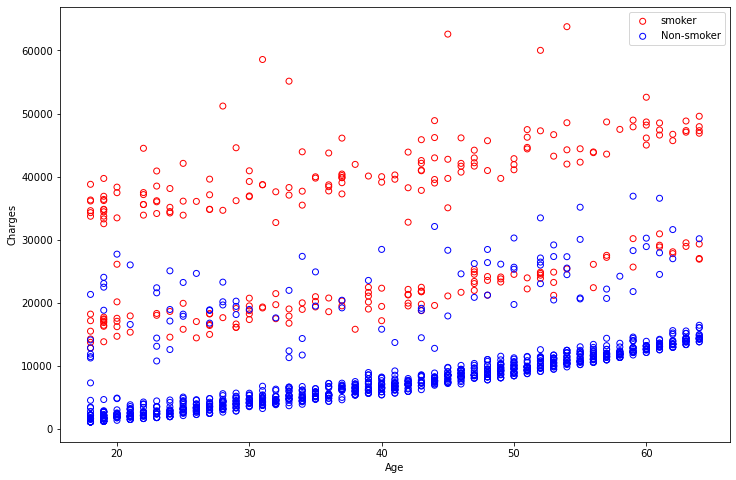

In [23]:
cond1 = df['smoker'] == 'yes'   # smoker
cond2 = df['smoker'] == 'no'    # non-smoker

fig = plt.figure(figsize = (12,8)) 
plt.scatter(df[cond1]['age'], df[cond1]['charges'], label = 'smoker', edgecolors = 'r', facecolors = 'none')
plt.scatter(df[cond2]['age'], df[cond2]['charges'], label = 'Non-smoker', edgecolors = 'b', facecolors = 'none')
plt.xlabel("Age")
plt.ylabel("Charges")
plt.legend()
plt.show()

There is a clear distinction between smokers and non-smokers. Non-smokers have lower insurance cost compared to smokers. However each smoker and non-smokers have distinct 2 class of charges. What's the factor causing a split of charges like this? Is it BMI? Let's classify clients with bmi less than 25 and bmi greater than 25.

36910.60803


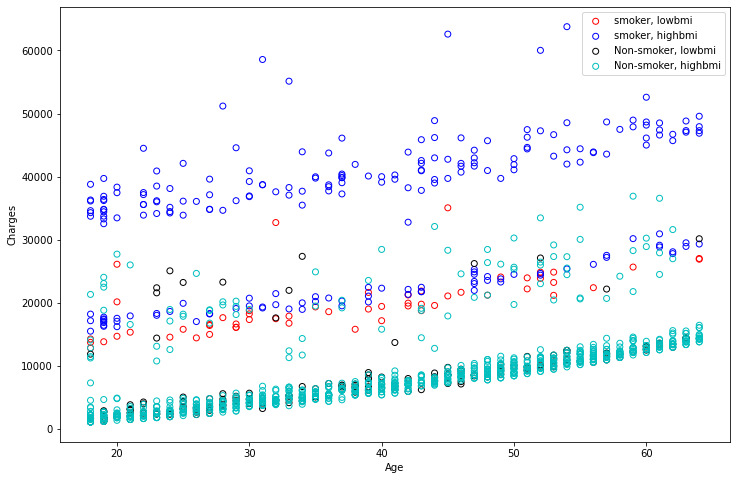

In [24]:
cond3 = df['bmi'] <= 25   # lowbmi
cond4 = df['bmi'] > 25  #highbmi

print(df[cond2 & cond4]['charges'].max())

fig = plt.figure(figsize = (12,8)) 
plt.scatter(df[cond1 & cond3]['age'], df[cond1 & cond3]['charges'], label = 'smoker, lowbmi', edgecolors = 'r', facecolors = 'none')
plt.scatter(df[cond1 & cond4]['age'], df[cond1 & cond4]['charges'], label = 'smoker, highbmi', edgecolors = 'b', facecolors = 'none')

plt.scatter(df[cond2 & cond3]['age'], df[cond2 & cond3]['charges'], label = 'Non-smoker, lowbmi', edgecolors = 'k', facecolors = 'none')
plt.scatter(df[cond2 & cond4]['age'], df[cond2 & cond4]['charges'], label = 'Non-smoker, highbmi', edgecolors = 'c', facecolors = 'none')

plt.xlabel("Age")
plt.ylabel("Charges")
plt.legend()
plt.show()

So BMI based classification does not make any sense. In addition, there are not clients who are smokers with high bmi which is interesting. Let's see if it has to do something with the sex of the individual.

/var/folders/c8/g5hp4hlx7dv6gv7n9zdg74rc0000gn/T/ipykernel_49093/2515681309.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plt.scatter(df[cond1][cond6]['age'], df[cond1][cond6]['charges'], label = 'smoker, female', edgecolors = 'y', facecolors = 'none')


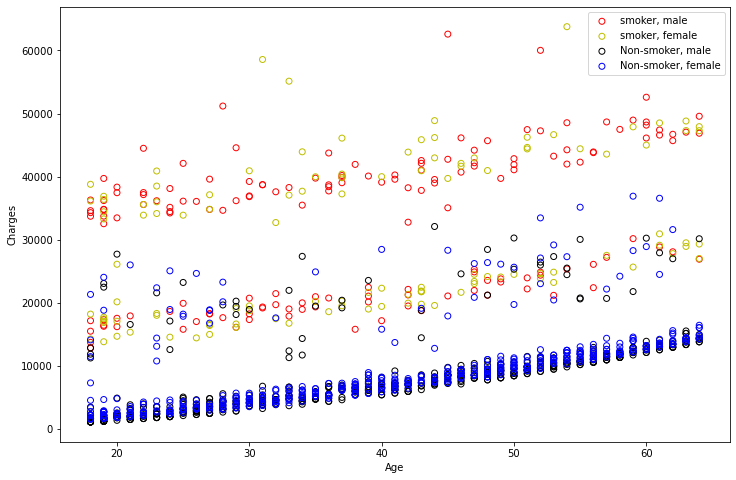

In [25]:
cond5 = df['sex'] == 'male'
cond6 = df['sex'] == 'female'

fig = plt.figure(figsize = (12,8)) 
plt.scatter(df[cond1 & cond5]['age'], df[cond1 & cond5]['charges'], label = 'smoker, male', edgecolors = 'r', facecolors = 'none')
plt.scatter(df[cond1][cond6]['age'], df[cond1][cond6]['charges'], label = 'smoker, female', edgecolors = 'y', facecolors = 'none')

plt.scatter(df[cond2 & cond5]['age'], df[cond2 & cond5]['charges'], label = 'Non-smoker, male', edgecolors = 'k', facecolors = 'none')
plt.scatter(df[cond2 & cond6]['age'], df[cond2 & cond6]['charges'], label = 'Non-smoker, female', edgecolors = 'b', facecolors = 'none')

plt.xlabel("Age")
plt.ylabel("Charges")
plt.legend()
plt.show()

Sex is also not a distinct factor here. Let's taka a look at the non-smokers with insurance charges greater than 10000 and smokers with charges greater than 30000. The upper class in each smoker vs non-smoker category

In [26]:
data1 = df[(df['smoker'] == 'no') & (df['charges'] > 10000)]
data2 = df[(df['smoker'] == 'yes') & (df['charges'] > 30000)]

Let's look at the data1 case:

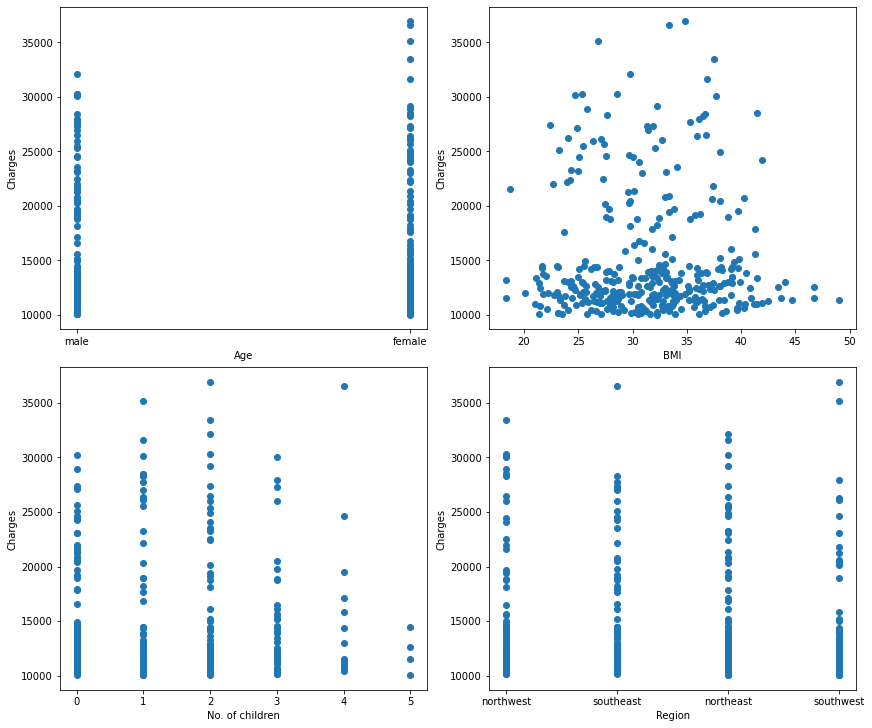

In [27]:
fig = plt.figure(figsize = (12,10), constrained_layout = True)

plt.subplot(2,2,1)
plt.scatter(data1['sex'], data1['charges'])
plt.xlabel("Age")
plt.ylabel("Charges")

plt.subplot(2,2,2)
plt.scatter(data1['bmi'], data1['charges'])
plt.xlabel("BMI")
plt.ylabel("Charges")

plt.subplot(2,2,3)
plt.scatter(data1['children'], data1['charges'])
plt.xlabel("No. of children")
plt.ylabel("Charges")

plt.subplot(2,2,4)
plt.scatter(data1['region'], data1['charges'])
plt.xlabel("Region")
plt.ylabel("Charges")

plt.show()

Now let's look at the data2 case:

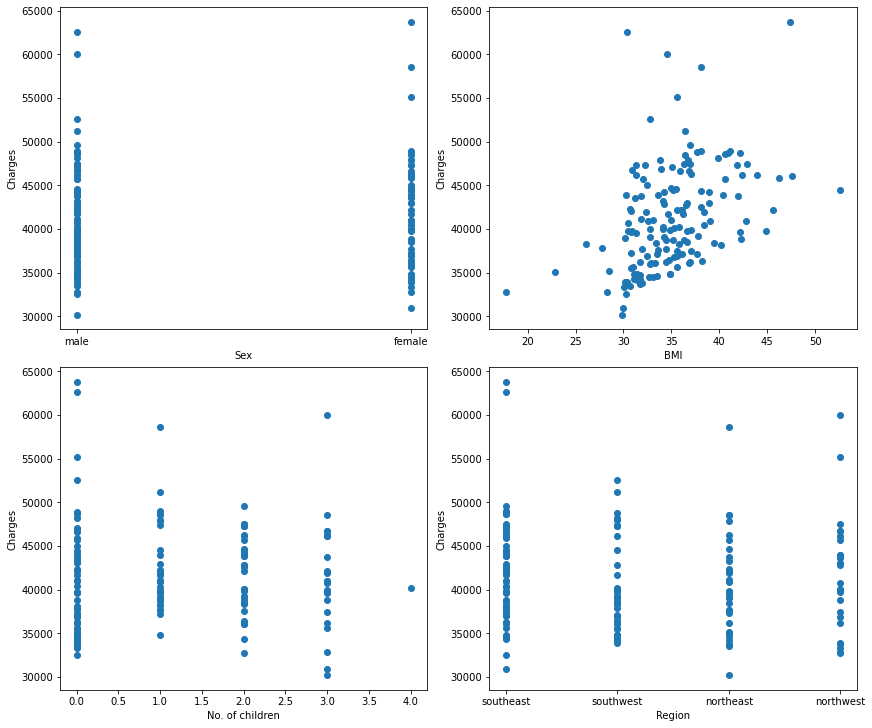

In [28]:
fig = plt.figure(figsize = (12,10), constrained_layout = True)

plt.subplot(2,2,1)
plt.scatter(data2['sex'], data2['charges'])
plt.xlabel("Sex")
plt.ylabel("Charges")

plt.subplot(2,2,2)
plt.scatter(data2['bmi'], data2['charges'])
plt.xlabel("BMI")
plt.ylabel("Charges")

plt.subplot(2,2,3)
plt.scatter(data2['children'], data2['charges'])
plt.xlabel("No. of children")
plt.ylabel("Charges")

plt.subplot(2,2,4)
plt.scatter(data2['region'], data2['charges'])
plt.xlabel("Region")
plt.ylabel("Charges")

plt.show()

In the non-smoker class with high charges, there is smaller correlation between charges and bmi. Interestingly most of the non-smoker with high charges are **obese**. It looks like the 2 distinct class in smoker vs non-smokers could be due to a range of factors.

Let's looks for correlations using the corr() function.

In [29]:
corr_matrix = df.corr() #correlation matrix
corr_matrix['charges']  # correlation of parameters with charges

age         0.299008
bmi         0.198341
children    0.067998
charges     1.000000
Name: charges, dtype: float64

The results are similar to what we already observed from the plots.

## Data preprocessing - cleaning, hot encoding and scaling
***Now let's build a multivariate linear regression model to predict the insurace charges.*** Before building we need to clean the data and split it into training and test datasets. Let's do that.

In [30]:
# Check for null/NAN values in dataset
df.isnull().any()

age         False
sex         False
bmi         False
children    False
smoker      False
region      False
charges     False
dtype: bool

In this dataset, we don't have any null values, so cleaning is not requried. But we have 3 categorical variables and most of the ML algorithms cannot feed cateogorical variables. We will use a technique called *one-hot encoding* to create a binary attribute for each category.

In [31]:
# let's use pandas get_dummies function to do the one-hot encoding
cat_variables = ['sex', 'smoker', 'region']
df = pd.get_dummies(data = df,
                         prefix = cat_variables,
                         columns = cat_variables)

df.info()
df.head()

Now all the categorical values have been one hot encoded. Let's split the data into train, test and cross validatation dataset

In [32]:
from sklearn.model_selection import train_test_split

# Split into train and test first
data_train, data_test = train_test_split(df, test_size = 0.4, random_state = 0)
# Split the test into test and validate again
data_test, data_val = train_test_split(data_test, test_size = 0.5, random_state = 0)
print(f" Train data shape : {data_train.shape}, Test data shape : {data_test.shape}, Validation data shape: {data_val.shape}")

 Train data shape : (802, 12), Test data shape : (268, 12), Validation data shape: (268, 12)


Let's extract the X and Y datasets from each of these cateogories:

In [33]:
y_train = data_train['charges']
x_train = data_train.drop('charges', axis = 1)
print(x_train.head())

y_test = data_test['charges']
x_test = data_test.drop('charges', axis = 1)
print(x_test.head())

y_val = data_val['charges']
x_val = data_val.drop('charges', axis = 1)
print(y_val)
print(x_val.head())

      age     bmi  children  sex_female  sex_male  smoker_no  smoker_yes  \
1099   25  33.990         1           1         0          1           0   
1316   19  20.600         0           1         0          1           0   
366    56  32.300         3           1         0          1           0   
548    25  28.595         0           1         0          1           0   
933    45  35.300         0           1         0          1           0   

      region_northeast  region_northwest  region_southeast  region_southwest  
1099                 0                 0                 1                 0  
1316                 0                 0                 0                 1  
366                  1                 0                 0                 0  
548                  1                 0                 0                 0  
933                  0                 0                 0                 1  
      age     bmi  children  sex_female  sex_male  smoker_no  smoker_

Before modelling the data, we need to do scale all the features to get accurate results. This is to avoid biasing towards features with large range of values.

In [34]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_norm = scaler.fit_transform(x_train) # Returns a numpy array and not a pandas df after normalization

print(f"Age min and max before normalization: {x_train['age'].min(), x_train['age'].max()}")
print(f"Age min and max after normalization: {x_train_norm[:,0].min(), x_train_norm[:, 0].max()}")

# similarly for validation and test dataset
x_val_norm = scaler.fit_transform(x_val)
x_test_norm = scaler.fit_transform(x_test)

Age min and max before normalization: (18, 64)
Age min and max after normalization: (-1.552491258917175, 1.7351792263576324)


## ML modelling

Let's try to do a multivariate regression modelling for the data. For this we we will use a multivariate linear model

The model's prediction with multiple variables is given by the linear model:

$$ f_{\mathbf{w},b}(\mathbf{x}) =  w_0x_0 + w_1x_1 +... + w_{n-1}x_{n-1} + b \tag{1}$$
or in vector notation:
$$ f_{\mathbf{w},b}(\mathbf{x}) = \mathbf{w} \cdot \mathbf{x} + b  \tag{2} $$ 
where $\cdot$ is a vector `dot product`

where
$$ x_0, x_1 ....., x_n $$ are feature vectors and $$ w_0, ..... w_b, b$$ are weight and bias parameters.

In order to conduct multivariate modelling, we use the SGDRegressor module from the scikit learn.

In [35]:
from sklearn.linear_model import SGDRegressor

sgdr = SGDRegressor(max_iter=1000, alpha = 0.001, epsilon=0.00001) # setting the maximum iteration and tolerance for stopping
#sgdr = LinearRegression()
sgdr.fit(x_train_norm, y_train)
print(sgdr)
print(f"number of iterations completed: {sgdr.n_iter_}, number of weight updates: {sgdr.t_}")

SGDRegressor(alpha=0.001, epsilon=1e-05)
number of iterations completed: 11, number of weight updates: 8823.0


In [36]:
b_norm = sgdr.intercept_
w_norm = sgdr.coef_
print(f"model parameters:                   w: {w_norm}, b:{b_norm}")

model parameters:                   w: [ 3618.40968718  2119.7489392    683.77019208   -19.4181457
    19.4181457  -4676.0524841   4676.0524841    267.24001564
    24.50980496  -108.96544338  -172.66285658], b:[13361.69772472]


Now let's predict the results on training dataset using this model we developed and how it deviates from the actual insurance charges:

In [37]:
y_pred_train = sgdr.predict(x_train_norm) # predicted charges from the model

# calculated value using equation 2
y_calc_train = np.dot(x_train_norm, w_norm) + b_norm

# Lets look at the first 5 values
print(f" predicted: {y_pred_train[:5]}")
print(f" calculated: {y_calc_train[:5]}")

 predicted: [ 5615.33703984 -1244.4735977  15056.69013479  4071.45847889
 10524.92784311]
 calculated: [ 5615.33703984 -1244.4735977  15056.69013479  4071.45847889
 10524.92784311]


Results from sgdr.predict and np.dot are the same. But some of these predicted insurance charges are negative which is indication of a poor model.

Now let's plot the actual charges and predicted charges to understand how good the model is.

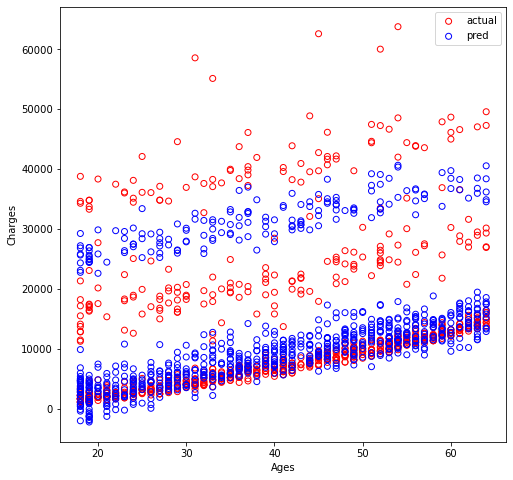

In [38]:
fig = plt.figure(figsize = (8,8))
plt.scatter(x_train['age'], y_train, label = 'actual', edgecolors = 'red', facecolors = 'none')
plt.scatter(x_train['age'], y_pred_train, label = 'pred', edgecolors = 'blue', facecolors = 'none')
plt.xlabel('Ages')
plt.ylabel("Charges")
#plt.ylim(0,10000)
plt.legend()
plt.show()

It looks like the model is high bias/underfit as the predicted values are very different from the actual training set values. Let's calculate the mean square error for this case:

In [39]:
from sklearn.metrics import mean_squared_error

mse_error = mean_squared_error(y_train, y_pred_train)

print(f" The mean squared error: {mse_error}")

 The mean squared error: 39230582.492473245


In [40]:
# Printing the actual charge and predicted value for the first 50 traning set
for i in range(50):
    print(y_train.iloc[i], y_pred_train[i])

3227.1211 5615.337039837474
1731.677 -1244.4735976996599
13430.265 15056.690134786124
3213.62205 4071.4584788885095
7348.142 10524.927843111482
9048.0273 13215.465988769798
11743.299 11315.163246254164
6571.02435 9139.84637470082
12557.6053 13606.891375506088
2196.4732 1054.719236397903
9174.13565 11347.150568092044
5138.2567 9442.087287537572
7421.19455 8089.69214064136
12363.547 15418.523387467721
11840.77505 12429.85298145091
20745.9891 29789.455738148186
13063.883 17648.825662103263
8062.764 10655.674909650814
7256.7231 9533.421922397032
26392.26029 13095.795703606474
5385.3379 5645.2171123454855
11033.6617 16049.063174170022
7077.1894 7440.137179547084
5266.3656 5401.266340828112
21880.82 31138.699065506684
10713.644 13728.860910641222
9634.538 13055.995101240225
12913.9924 12431.44411925222
10269.46 12754.773245770062
5125.2157 5198.946371477575
3484.331 2838.5741178223143
5080.096 4345.206052844545
6402.29135 6027.865084987323
1704.70015 447.65764300194314
7243.8136 8457.6694292

In some training examples, the the model does a good job. Let's try to add some polynomial features to see if the model does a better job.

In [41]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree = 3, include_bias=False) # using degree 3 polynomial features
x_train_mapped = poly.fit_transform(x_train)
x_train_mapped_norm = scaler.fit_transform(x_train_mapped)

print(x_train_mapped_norm.shape)


(802, 363)


We have 363 features instead of 11 features. Let's see how the model performs.

SGDRegressor(alpha=0.1, epsilon=1e-05)
number of iterations completed: 14, number of weight updates: 11229.0


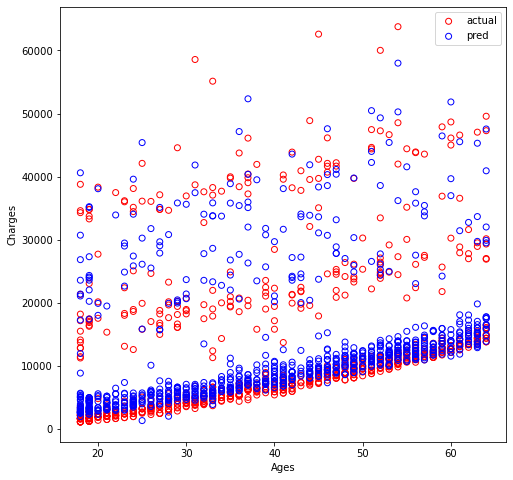

 The mean squared error: 25707043.673429746


In [42]:
sgdr_poly = SGDRegressor(max_iter=1000, alpha = 0.1, epsilon=0.00001) # setting the maximum iteration and tolerance for stopping
sgdr_poly.fit(x_train_mapped_norm, y_train)
print(sgdr_poly)
print(f"number of iterations completed: {sgdr_poly.n_iter_}, number of weight updates: {sgdr_poly.t_}")

# Fitted parameters
b_norm_poly = sgdr_poly.intercept_
w_norm_poly = sgdr_poly.coef_
#print(f"model parameters:                   w: {w_norm_poly}, b:{b_norm_poly}")

# predicted charges 
y_pred_train_poly = sgdr_poly.predict(x_train_mapped_norm) # predicted charges from the model

fig = plt.figure(figsize = (8,8))
plt.scatter(x_train['age'], y_train, label = 'actual', edgecolors = 'red', facecolors = 'none')
plt.scatter(x_train['age'], y_pred_train_poly, label = 'pred', edgecolors = 'blue', facecolors = 'none')
plt.xlabel('Ages')
plt.ylabel("Charges")
#plt.ylim(0,10000)
plt.legend()
plt.show()

mse_error_poly = mean_squared_error(y_train, y_pred_train_poly)

print(f" The mean squared error: {mse_error_poly}")

This model does a better job in the estimation of insurance charges. Let's see how it performs for the validataion dataset.

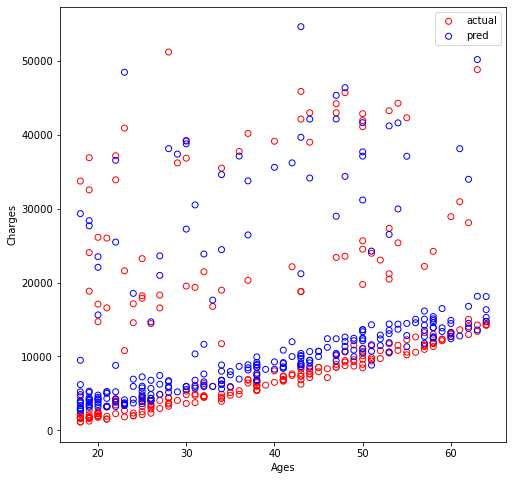

 The mean squared error: 23265273.605978593


In [43]:

x_val_mapped = poly.fit_transform(x_val)
x_val_mapped_norm = scaler.fit_transform(x_val_mapped)

# predicted charges for validation dataset
y_pred_val_poly = sgdr_poly.predict(x_val_mapped_norm) # predicted charges from the model

fig = plt.figure(figsize = (8,8))
plt.scatter(x_val['age'], y_val, label = 'actual', edgecolors = 'red', facecolors = 'none')
plt.scatter(x_val['age'], y_pred_val_poly, label = 'pred', edgecolors = 'blue', facecolors = 'none')
plt.xlabel('Ages')
plt.ylabel("Charges")
#plt.ylim(0,10000)
plt.legend()
plt.show()

mse_error_val_poly = mean_squared_error(y_val, y_pred_val_poly)

print(f" The mean squared error: {mse_error_val_poly}")

The MSE error is lesser on the validation set is lesser than the training set >> that model is pretty good with prediction. Let's see how it generalizes with the test set.


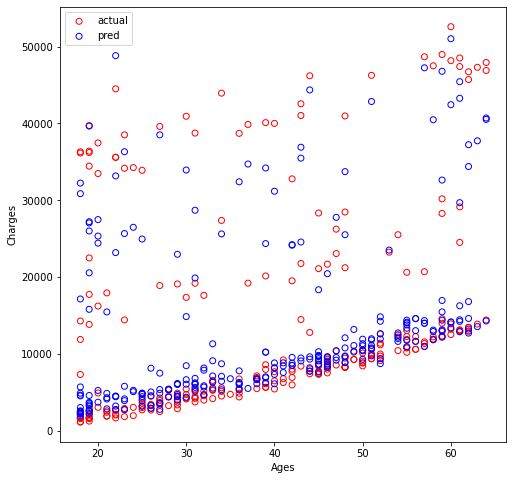

 The mean squared error: 22963208.61143515


In [44]:
x_test_mapped = poly.fit_transform(x_test)
x_test_mapped_norm = scaler.fit_transform(x_test_mapped)

# predicted charges for validation dataset
y_pred_test_poly = sgdr_poly.predict(x_test_mapped_norm) # predicted charges from the model

fig = plt.figure(figsize = (8,8))
plt.scatter(x_test['age'], y_test, label = 'actual', edgecolors = 'red', facecolors = 'none')
plt.scatter(x_test['age'], y_pred_test_poly, label = 'pred', edgecolors = 'blue', facecolors = 'none')
plt.xlabel('Ages')
plt.ylabel("Charges")
#plt.ylim(0,10000)
plt.legend()
plt.show()

mse_error_test_poly = mean_squared_error(y_test, y_pred_test_poly)

print(f" The mean squared error: {mse_error_test_poly}")



In [45]:
# Printing the actual charge and predicted value for the first 50 traning set
for i in range(50):
    print(y_test.iloc[i], y_pred_test_poly[i])

7986.47525 10242.494420471454
28287.89766 13143.730857649824
37465.34375 27485.007687786914
19107.7796 22968.892056506695
48675.5177 47240.406620645175
8269.044 9731.805409317825
4428.88785 5366.054688427203
4441.21315 6234.0882458875285
8556.907 9185.322348736236
26236.57997 9541.042497934373
10560.4917 10787.127966529348
19515.5416 24224.294471986424
17748.5062 20558.03880206142
7323.734819 4630.799921148822
2117.33885 2555.716273840404
2154.361 3216.4619680566975
5261.46945 6327.419332618458
1704.5681 3029.5535248256874
12244.531 12178.423067666183
9361.3268 9741.921054268887
20630.28351 14129.528582668805
12333.828 14390.592054728693
39722.7462 39656.5876479166
36149.4835 30862.06181689712
46718.16325 34396.733533026214
4243.59005 6039.667619692524
14283.4594 17151.231149853185
35585.576 33170.12466237694
1256.299 4597.045042353951
10796.35025 11789.45514575187
14001.2867 15474.276857095587
6496.886 7338.321750054027
13887.9685 13553.857734349516
11879.10405 13347.247009707427
4137

Even though this is a good model, it still require some more development to do a better job on the prediction.